<a href="https://www.kaggle.com/devon37/mushroom-classifier-take-1?scriptVersionId=89696158" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# I. Load data and import relevant packages.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('../input/mushroom-classification/mushrooms.csv')

8124 data observations, 23 columns per observation.  First column, titled 'class' is whether or not the mushroom is 
edible.  The remaining 22 columns are the features (attributes), which can be found below:

7. Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d,

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# II. Visualize the data by creating countplots of edibility vs. poisionous for each feature.

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Shape")]

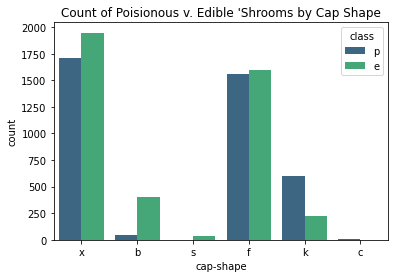

In [6]:
sb.countplot(data=data, x='cap-shape', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Shape')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Surface")]

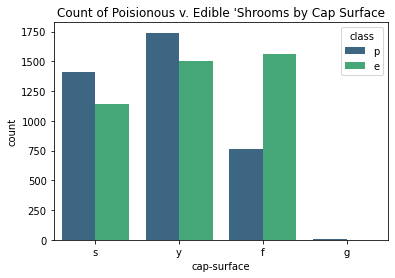

In [7]:
sb.countplot(data=data, x='cap-surface', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Surface')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Color")]

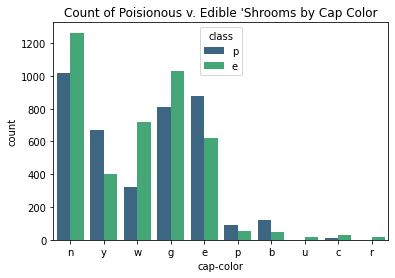

In [8]:
sb.countplot(data=data, x='cap-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Presence of Bruising")]

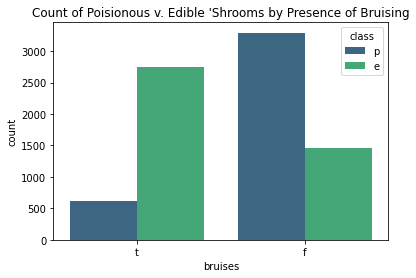

In [9]:
sb.countplot(data=data, x='bruises', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Presence of Bruising')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Odor")]

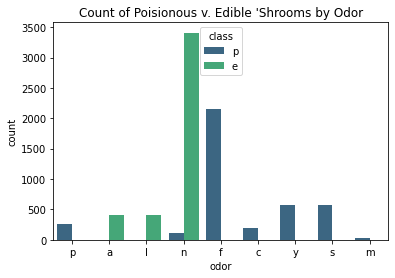

In [10]:
sb.countplot(data=data, x='odor', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Odor')

If the odor of the mushroom is that of almond or anise, the mushroom is safe to eat.  Otherwise, it is best to avoid the mushroom.  Notice that a large number of mushrooms with no odor are safe to eat, but a few are poisionous as well.  This indicates that odorless mushrooms are likely safe to eat, but not in every case.

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Attachment")]

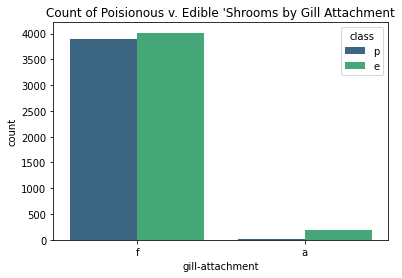

In [11]:
sb.countplot(data=data, x='gill-attachment', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Attachment')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Spacing")]

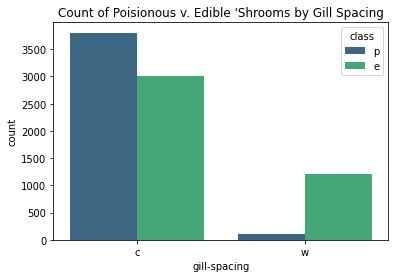

In [12]:
sb.countplot(data=data, x='gill-spacing', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Spacing')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Size")]

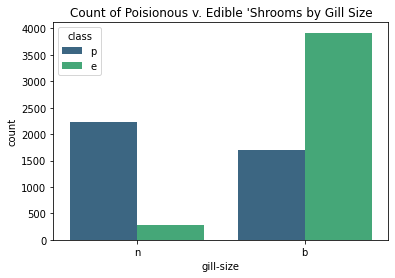

In [13]:
sb.countplot(data=data, x='gill-size', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Size')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Color")]

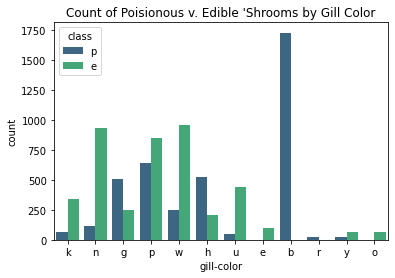

In [14]:
sb.countplot(data=data, x='gill-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Color')

 If the gill color is brown or green, mushroom is always poisonous. Otherwise, if the gill color is red or orange, it is safe to eat.

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Stalk Shape")]

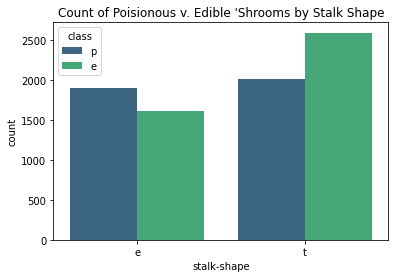

In [15]:
sb.countplot(data=data, x='stalk-shape', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Stalk Shape')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Stalk Root")]

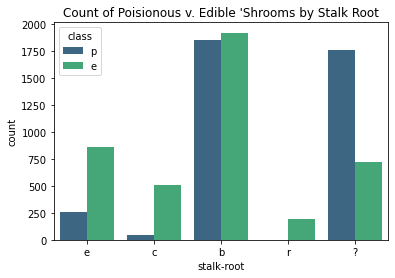

In [16]:
sb.countplot(data=data, x='stalk-root', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Stalk Root')

Notice that this stalk-root attribute has missing data, the '?' column.

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Above-Ring Stalk Surface")]

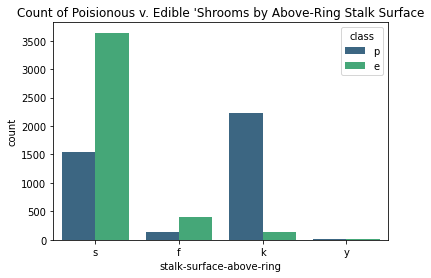

In [17]:
sb.countplot(data=data, x='stalk-surface-above-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Above-Ring Stalk Surface')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Below Ring Stalk Surface")]

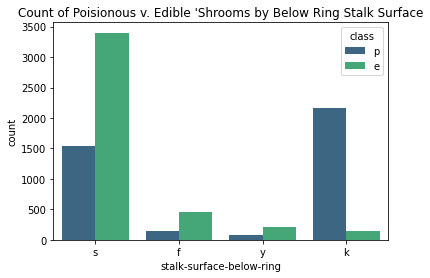

In [18]:
sb.countplot(data=data, x='stalk-surface-below-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Below Ring Stalk Surface')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Above Ring Stalk Color")]

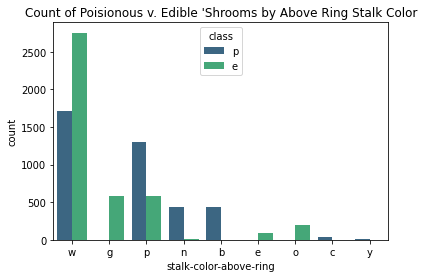

In [19]:
sb.countplot(data=data, x='stalk-color-above-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Above Ring Stalk Color')

If the above ring stalk color is gray, red, or orange, that mushroom is safe to eat.  If the above ring stalk color is buff though, always avoid!

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Below-Ring Stock Color")]

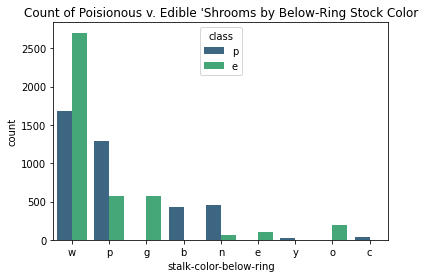

In [20]:
sb.countplot(data=data, x='stalk-color-below-ring', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Below-Ring Stock Color')

If the below ring stalk color is gray or orange, it is safe to eat.  However, if the below ring stalk color is buff or cinnamon, it is always poisonous!

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Veil Type")]

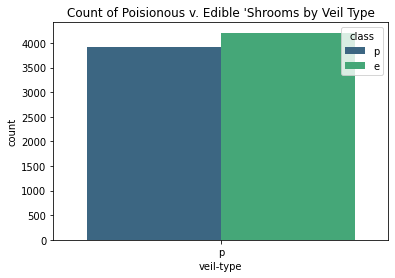

In [21]:
sb.countplot(data=data, x='veil-type', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Veil Type')

Veil type feature has two possible categories, partial or uinversal, yet all observations in this data set have partial veils, so this feature might not be a good indicator of poisionous or edibility of mushrooms.

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Veil Color")]

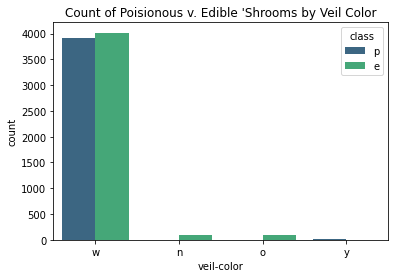

In [22]:
sb.countplot(data=data, x='veil-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Veil Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Ring Number")]

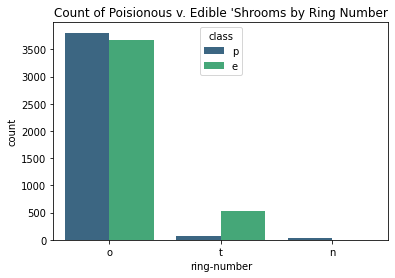

In [23]:
sb.countplot(data=data, x='ring-number', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Ring Number')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Ring Type")]

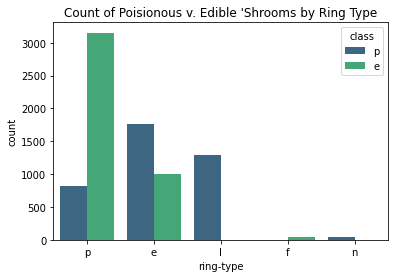

In [24]:
sb.countplot(data=data, x='ring-type', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Ring Type')

If the mushroom has large rings, it is always poisonous.

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Spore Print Color")]

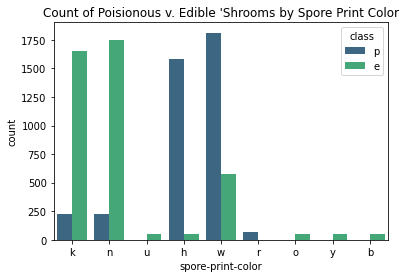

In [25]:
sb.countplot(data=data, x='spore-print-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Spore Print Color')

If the spore print color is green, it is always poisonous.  Likewise, chocolate and white spore prints are almost always poisonous.  However, purple, orange, yellow and buff spore prints are always safe to eat.  Black and brown spore prints are usually safe to eat as well, but not always!

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Population")]

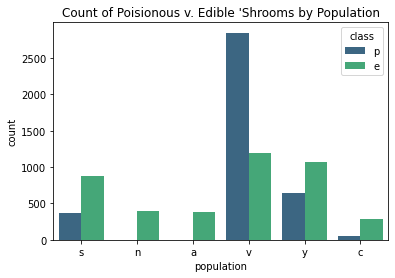

In [26]:
sb.countplot(data=data, x='population', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Population')

If the population of mushrooms is numerous or abundant, then the mushrooms are safe to eat.  However, any other kind of population has the chance of being poisonous, especially if the population is several.  This feature seems to be very subjective without more information, though.  Several v. Abundant v. Numerous are not well-enough defined categories for me to risk my life.

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Habitat")]

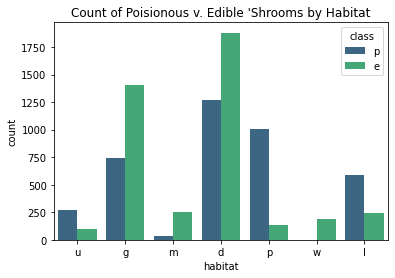

In [27]:
sb.countplot(data=data, x='habitat', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Habitat')

Mushrooms coming from waste are always edible.  Otherwise, it is a good idea to avoid the mushrooms.  Realistically speaking, I wouldn't want to eat a mushroom that was growing in waste... whatever that waste might be.

# III.  Create and test some binary classification models!

In [28]:
# First,split data into targets (i.e. 'class') and features
target = data['class'] # Labels for each observation
features = data.drop(['class'], axis=1)

In [29]:
features # Same data as before, without the class variable (that is, the target labels have been dropped)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [30]:
# Split data into train-test-validation sets.  Training set will have 50% of the data, test and validation sets
# will each have 25% of the data.  Need to call train_test_split twice to get this spiltting.
x_train, x_rem, y_train, y_rem = train_test_split(features, target, test_size=(2/3), random_state=42)
x_test, x_val, y_test, y_val   = train_test_split(x_rem, y_rem, test_size=0.5, random_state=42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(2708, 22)
(2708, 22)
(2708, 22)


In [32]:
# Next, create a method that determines the accuracy of a binary classification model by comparing the number of 
# correctly identified instances of mushrooms
def model_accuracy(prediction, actual):
    _length = len(prediction)
    actual = list(actual)
    if _length != len(actual): return None
    counter = 0
    for obs in range(_length):
        if prediction[obs] == actual[obs]: counter += 1
    return ((counter/_length)*100)

In [33]:
# Now, create a method that can run a model and output its accuracy for train, test, and validation data sets
def run_model(model, name):
    train_model = model(x_train)
    test_model  = model(x_test)
    train_acc = model_accuracy(train_model, y_train)
    test_acc  = model_accuracy(test_model, y_test)
    print(f'The training accuracy of {name} is {train_acc:.3f}%.')
    print(f'The testing accuracy of {name} is {test_acc:.3f}%.')
    

In [34]:
# Check that the feature data and label data have the proper shape
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')

x_train shape: (2708, 22)
y_train shape: (2708,)
x_test shape: (2708, 22)
y_test shape: (2708,)
x_val shape: (2708, 22)
y_val shape: (2708,)


In [35]:
def model1(input_data):
    '''Classifies edibility of mushrooms by odor.  If the odor of an observation is  almond, anise, or none,  assign 'e'.  Otherwise, assign 'p'. '''
    predicted = []
    odor = list(input_data['odor'])
    edible_odors = ['a', 'l', 'n']
    for obs in range(len(input_data)):
        if odor[obs] in edible_odors: predicted.append('e')
        else: predicted.append('p')
    return predicted

In [36]:
run_model(model1, 'model1')

The training accuracy of model1 is 98.486%.
The testing accuracy of model1 is 98.560%.


In [37]:
def model2(input_data):
    '''Assigns 'e' for edible or 'p' poisonous by checking two features and making a decision.  If the odor of an observation is almond, anise, or none, or if the spore print color is black or brown, assign 'e'.  Otherwise, assign 'p'.'''
    predicted = []
    odor, spore = list(input_data['odor']), list(input_data['spore-print-color'])
    edible_odor, edible_spore = ['a', 'l', 'n'], ['k', 'n']
    for obs in range(len(input_data)):
        if odor[obs] is edible_odor or spore[obs] in edible_spore:predicted.append('e')
        else: predicted.append('p')
    return predicted

In [38]:
run_model(model2, 'model2')

The training accuracy of model2 is 84.675%.
The testing accuracy of model2 is 84.712%.


# IV. Re-code the data so that there is only numeric values in data table.

In [39]:
new_labels = LabelEncoder()
new_labels_data = data.copy()
new_labels_data = new_labels_data.apply(LabelEncoder().fit_transform)

In [40]:
encoded_target = new_labels_data['class']
encoded_features = new_labels_data.drop(['class'], axis=1)

In [41]:
encoded_target.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [42]:
encoded_features.head() # same as features table above, but now the table has numeric entries instead of strings

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [43]:
# Split data into train-test-validation sets.  Training set will have 50% of the data, test and validation sets will each have 25% of the data.  \
# Need to call train_test_split twice to get this spiltting.  Note the lx_ and ly_ variables; these are the newly encoded data, not to be confused 
# with the initial data variables x_ and y_ that had strings as the  values for different features
lx_train, lx_rem, ly_train, ly_rem = train_test_split(encoded_features, encoded_target, test_size=(2/3), random_state=42)
lx_test, lx_val, ly_test, ly_val   = train_test_split(lx_rem, ly_rem, test_size=0.5, random_state=42)

# V. Construct K-Nearest Neighbors models for K=2 to K=6.

In [44]:
# Model 3, a 2-Nearest Neighbors model
two_neighbors_model = KNeighborsClassifier(n_neighbors=2)
two_neighbors_model.fit(lx_train, ly_train) # train the model
two_train_score = two_neighbors_model.score(lx_train, ly_train)
two_test_prediction  = two_neighbors_model.predict(lx_test)

two_train_score = two_neighbors_model.score(lx_train, ly_train)
two_test_score  = two_neighbors_model.score(lx_test, ly_test)

print(f'For the 2-Nearest Neighbors model, the training set accuracy is {(two_train_score*100):.3f}% and the test set accuracy is {(two_test_score*100):.3f}%.')

#Output accuracy for test and train.  Validation as well?
#Then build models for k=3 and k=6 and logistic

For the 2-Nearest Neighbors model, the training set accuracy is 99.889% and the test set accuracy is 99.668%.


In [45]:
# Model 4, a 3-Nearest Neighbors model
three_neighbors_model = KNeighborsClassifier(n_neighbors=3)
three_neighbors_model.fit(lx_train, ly_train)
three_test_prediction = three_neighbors_model.predict(lx_test)

three_train_score = three_neighbors_model.score(lx_train, ly_train)
three_test_score  = three_neighbors_model.score(lx_test, ly_test)

print(f'For the 3-Nearest Neighbors model, the training set accuracy is {(three_train_score*100):.3f}% and the test set accuracy is {(three_test_score*100):.3f}%.')

For the 3-Nearest Neighbors model, the training set accuracy is 99.926% and the test set accuracy is 99.742%.


In [46]:
# Model 5, a 4-Nearest Neighbors model
four_neighbors_model = KNeighborsClassifier(n_neighbors=4)
four_neighbors_model.fit(lx_train, ly_train)
four_neighbors_prediction = four_neighbors_model.predict(lx_test)

four_train_score = four_neighbors_model.score(lx_train, ly_train)
four_test_score  = four_neighbors_model.score(lx_test, ly_test)

print(f'For the 4-Nearest Neighbors model, the training set accuracy is {(four_train_score*100):.3f}% and the test set accuracy is {(four_test_score*100):.3f}%.')

For the 4-Nearest Neighbors model, the training set accuracy is 99.594% and the test set accuracy is 99.446%.


In [47]:
# Model 6, a 5-Nearest Neighbors model
five_neighbors_model = KNeighborsClassifier(n_neighbors=5)
five_neighbors_model.fit(lx_train, ly_train)
five_neighbors_prediction = five_neighbors_model.predict(lx_test)

five_train_score = five_neighbors_model.score(lx_train, ly_train)
five_test_score  = five_neighbors_model.score(lx_test, ly_test)

print(f'For the 5-Nearest Neighbors model, the training set accuracy is {(five_train_score*100):.3f}% and the test set accuracy is {(five_test_score*100):.3f}%.')

For the 5-Nearest Neighbors model, the training set accuracy is 99.557% and the test set accuracy is 99.520%.


In [48]:
# Model 7, a  6-Nearest Neighbors model
six_neighbors_model = KNeighborsClassifier(n_neighbors=6)
six_neighbors_model.fit(lx_train, ly_train)
six_neighbors_prediction = six_neighbors_model.predict(lx_test)

six_train_score = six_neighbors_model.score(lx_train, ly_train)
six_test_score  = six_neighbors_model.score(lx_test, ly_test)

print(f'For the 6-Nearest Neighbors model, the training set accuracy is {(six_train_score*100):.3f}% and the test set accuracy is {(six_test_score*100):.3f}%.')

For the 6-Nearest Neighbors model, the training set accuracy is 99.409% and the test set accuracy is 99.298%.


# VI. Construct a Logistic Regression model.


In [49]:
# Model 8, a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=0) # solver arg is used to avoid Attribute Error, got from Stack Exchange
log_reg.fit(lx_train, ly_train)
prediction = log_reg.predict(lx_test)

log_reg_train_score = log_reg.score(lx_train, ly_train)
log_reg_test_score  = log_reg.score(lx_test, ly_test)

print(f'For the Logistic Regression model, the training set accuracy is {(log_reg_train_score*100):.3f}% and the test set accuracy is {(log_reg_test_score*100):.3f}%.')

For the Logistic Regression model, the training set accuracy is 95.384% and the test set accuracy is 95.310%.


# VII. Choosing a model and validation.

Of all eight models (two binary classification, five nearest neighbor, one logistic regression), the K-Nearest Neighbors model with K=3 has the highest test set accuracy with 99.93%, so this is the model we will choose and run our validation set through.  Note that all of the K-Nearest Neighbors models correctly classify the training and test data (> 99.30% train/test accuracy).  The binary decision model that splits on odor also does quite well with 98.56% test set accuracy, but we will choose the model that has the highest accuracy on the test data which is the KNN model with K=3.

Now that we have a model selected, we will run K-fold cross validation, setting K=5 folds.  

In [50]:
validation_score = cross_val_score(
    three_neighbors_model, lx_val, ly_val, cv=5)
validation_score

array([0.99630996, 0.99815498, 0.99630996, 0.99260628, 0.99630314])

In [51]:
print(f'The validation accuracy from the chosen 3-Nearest Neighbors model is {(validation_score.mean()*100):.3f}%.')

The validation accuracy from the chosen 3-Nearest Neighbors model is 99.594%.
